# Ultimate Technologies Challenge

# Part 1 ‐ exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15 minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [78]:
import json
from datetime import datetime
from dateutil.parser import parse

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

In [2]:
# import json file
data = pd.read_json('logins.json')
login = data.copy()

In [3]:
login.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
login.shape

(93142, 1)

In [5]:
login.set_index('login_time', inplace=True)
login['count'] = 1 # create new column with counter

login.resample('15T').sum() # count in 15 minute intervals

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


In [6]:
minute_int = login.resample('15T').sum()
minute_int.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [7]:
minute_int = minute_int.reset_index()
minute_int.head()

,login_time,count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


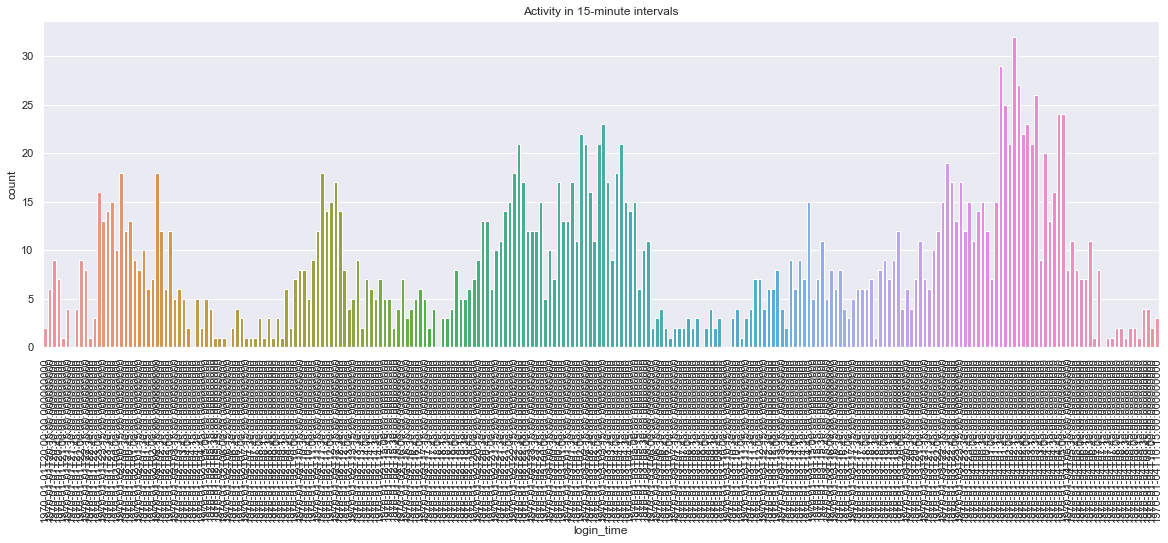

In [8]:
# plot timestamp for first 250 timestamps
plt.figure(figsize=(20, 6))
p = sns.barplot(x='login_time', y='count', data=minute_int.iloc[:250])
p.set_xticklabels(p.get_xticklabels(), rotation=90)
plt.title('Activity in 15-minute intervals')
plt.show()

After separating the timestamps into 15 minute intervals and counting how many there are per interval, the next part is to create bar plots of each day. We start by defining a function that locates the indexes of the range of times for one day. After returning the locations on the dataset, the next function graphs the data. Since there are a lot of timestamps for each day, we are only plotting one day at a time for visualization clarity.

In [9]:
# define a function that returns the locations of the date entered
def time_frame(year, month, day):
    indexes = []
    for x in range(len(minute_int)):
        dates = ((minute_int['login_time'].iloc[x].year == year) & (minute_int['login_time'].iloc[x].month == month) & (minute_int['login_time'].iloc[x].day == day))
        if dates == True:
            indexes.append(minute_int.iloc[x].name) # locations of dates
    return indexes[0], indexes[-1] + 1 # returns the coordinates

In [10]:
# define a function that plots the traffic for a specific date
def sns_plot(year, month, day):
    x, y = time_frame(year, month, day)
    plt.figure(figsize=(20, 6))
    p = sns.barplot(x='login_time', y='count', data=minute_int.iloc[x:y])
    p.set_xticklabels(p.get_xticklabels(), rotation=90)
    plt.title('Traffic in 15 minute intervals')
    plt.show()

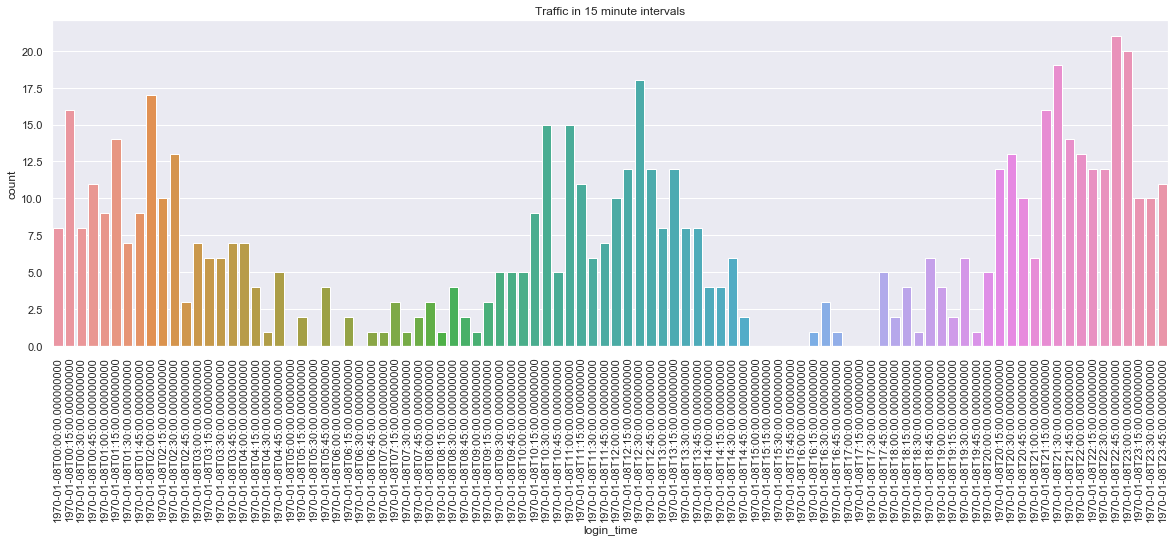

In [11]:
sns_plot(1970, 1, 8)

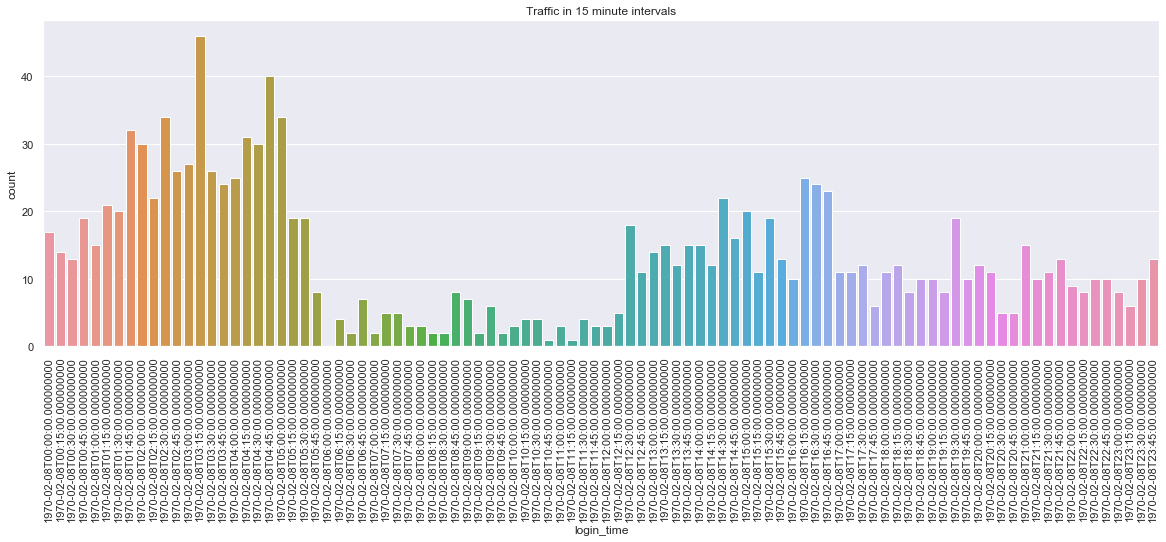

In [12]:
sns_plot(1970, 2, 8)

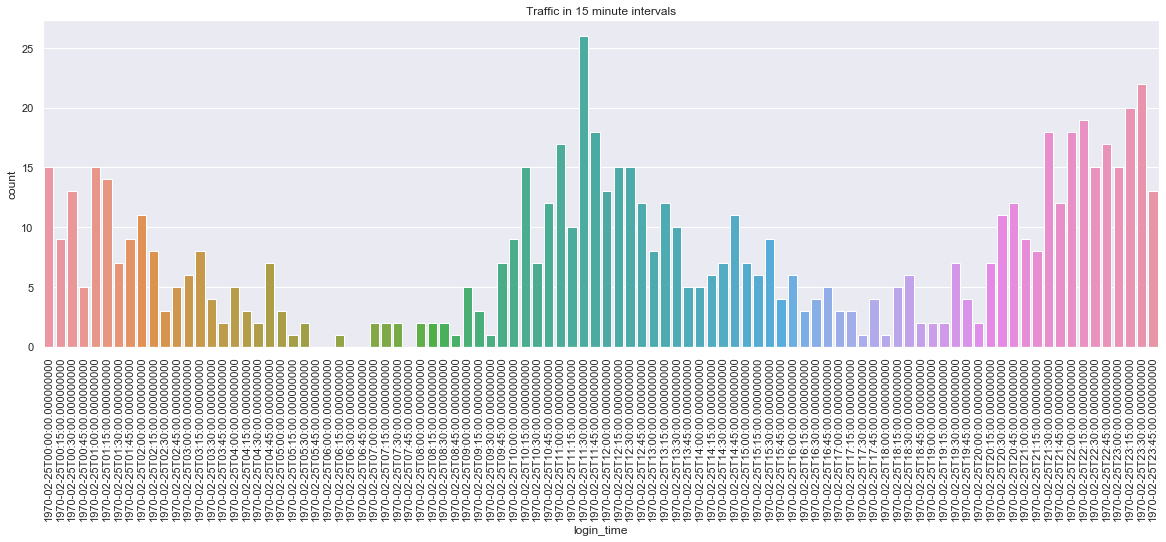

In [13]:
sns_plot(1970, 2, 25)

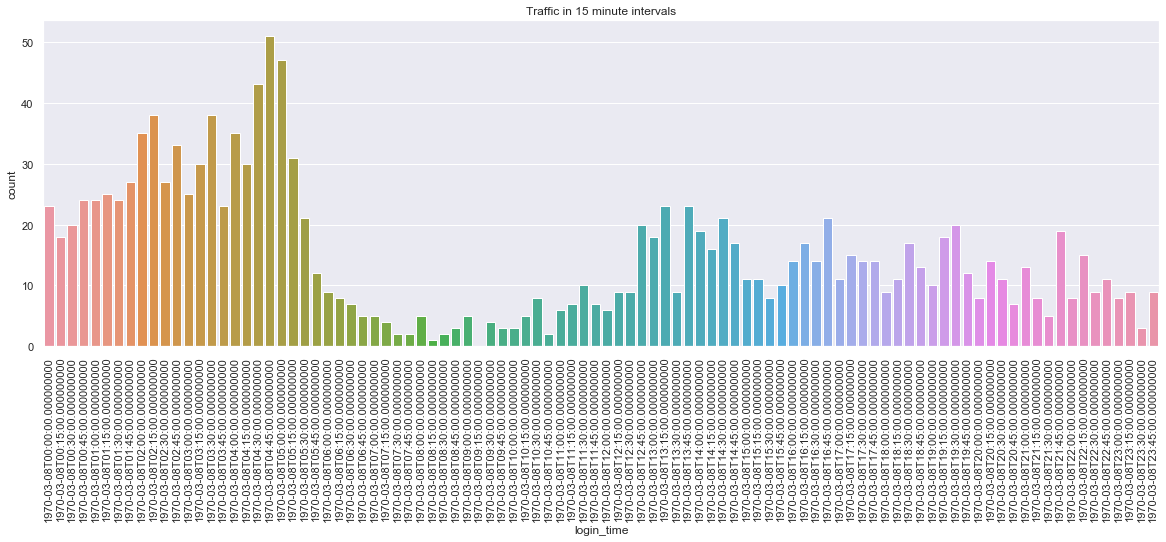

In [14]:
sns_plot(1970, 3, 8)

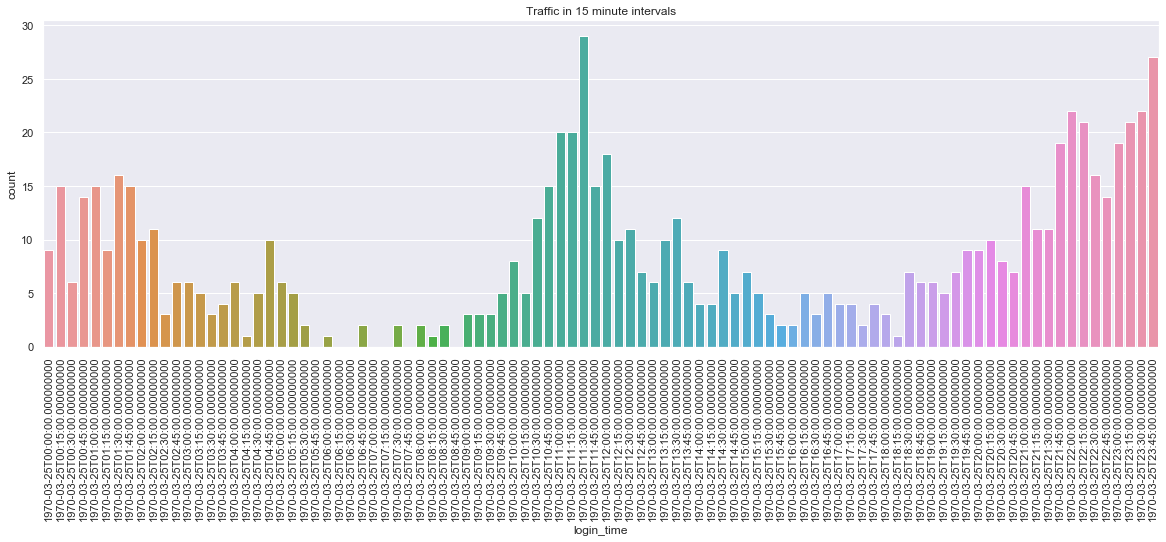

In [15]:
sns_plot(1970, 3, 25)

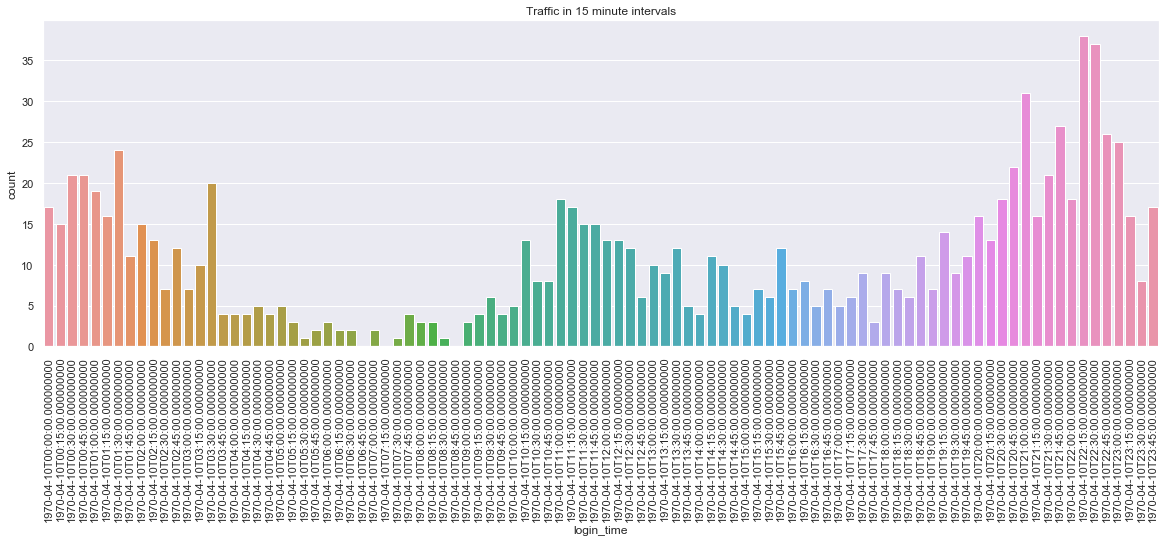

In [16]:
sns_plot(1970, 4, 10)

The pattern is representative of a working day; traffic peaks happen in the morning, around noon, and into the night.

# Part 2 ‐ experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two-way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
    1. how you will implement the experiment
    2. what statistical test(s) you will conduct to verify the significance of the observation
    3. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

**Response:**

If toll booth revenue increases on both sides, then that means driver partners are using the bridge instead of staying exclusive to one area. Specifically, we need to measure the reimbursement claims from these toll booths since only driver partners have this privilege. If they are using the toll booth, then we know they are most likely looking for clients in the other city.

To test the effectiveness of the proposed change, we can implement an experiment measuring the amount of daily traffic received at the toll booths over a period of 6-8 months. Each toll booth will have a counter that counts the number of cars passing through each day with a time stamp. We can use fee records taken from the toll booths before the implementation as a control and compare the daily numbers since every car passing through must pay a fee to cross. The significance is tested using a 2-sample t-test and z-test with a p-value of 0.05. If we find that the increase in traffic is statistically significant, then we can say that driver partners are taking advantage of the free toll booths. However, it is also possible that the population of the city is growing and more people need to cross the bridge to get to work.

# Part 3 ‐ predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were "active" (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long-term rider retention (again, a few sentences will suffice).

## Data Wrangling

In [17]:
# import json file
data_challenge = json.load((open('ultimate_data_challenge.json')))
data_challenge = pd.DataFrame(data_challenge) # convert to DataFrame

rider = data_challenge.copy()

In [18]:
rider.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [19]:
rider.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [20]:
rider.shape

(50000, 12)

In [21]:
# basic statistics
round(rider.describe(), 2)

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.00,41878.00,50000.00,50000.00,50000.00,50000.00,49799.00
mean,2.28,4.60,1.07,8.85,60.93,5.80,4.78
std,3.79,0.62,0.22,19.96,37.08,5.71,0.45
min,0.00,1.00,1.00,0.00,0.00,0.00,1.00
25%,0.00,4.30,1.00,0.00,33.30,2.42,4.70
50%,1.00,4.90,1.00,0.00,66.70,3.88,5.00
75%,3.00,5.00,1.05,8.60,100.00,6.94,5.00
max,125.00,5.00,8.00,100.00,100.00,160.96,5.00


In [22]:
# check for NaN
rider.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

Since our dataset is large, we can remove the rows missing an average driver rating. In order to predict if a user will continue to be a customer, it's important to understand how they feel about their drivers.

In [23]:
# rows missing average driver rating
rider[rider.avg_rating_of_driver.isnull()].head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
6,Astapor,1,2014-01-24,NaN,1.0,2014-01-25,Android,0.0,False,100.0,3.95,4.0
9,Winterfell,1,2014-01-03,NaN,1.0,2014-01-05,Android,0.0,False,0.0,2.37,5.0
12,Winterfell,1,2014-01-15,NaN,1.0,2014-03-12,iPhone,0.0,False,100.0,20.29,5.0
14,Astapor,1,2014-01-27,NaN,1.0,2014-01-28,Android,0.0,False,100.0,26.01,5.0
15,Winterfell,1,2014-01-15,NaN,1.0,2014-01-16,Android,0.0,True,100.0,13.20,5.0


In [24]:
# remove rows without an average driver rating
rider = rider.dropna(axis=0, subset=['avg_rating_of_driver'])

Empty phone types will be replaced with Unknown since we do not know what type of phone they used. We are keeping this column.

In [25]:
# fill na with Unknown
rider['phone'].fillna('Unknown', inplace=True)

Driver experiences of users is also important so we are removing riders who do not have a driver review.

In [26]:
# remove rows without average rider rating
rider = rider.dropna(axis=0, subset=['avg_rating_by_driver'])

In [27]:
rider.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


## Data Visualization and Storytelling

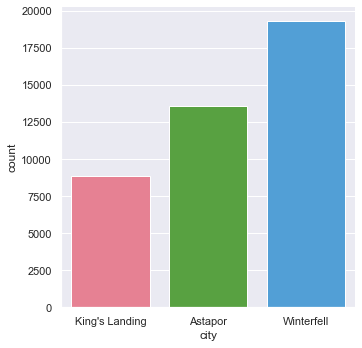

In [28]:
# city
sns.catplot(x='city', kind='count', palette='husl', data=rider)
plt.show()

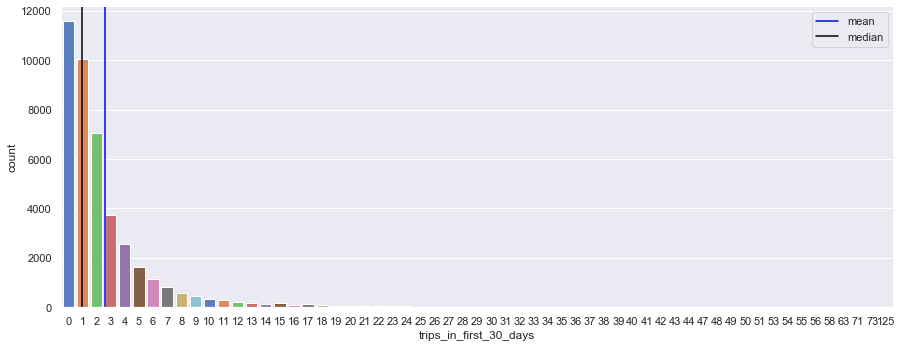

In [34]:
# trips in fist 30 days
sns.catplot(x='trips_in_first_30_days', kind='count', aspect=2.5, palette='muted', data=rider)
plt.axvline(np.mean(rider.trips_in_first_30_days), color='blue', label='mean')
plt.axvline(np.median(rider.trips_in_first_30_days), color='black', label='median')
plt.legend()
plt.show()

The majority of riders take less than 20 trips during their first 30 days. That's about 1 trip a day during the week. On the more extreme end, some took 30+ rides in the same time frame. To better represent the majority of riders, we are removing those who took more than 25 trips.

In [37]:
# remove rows with more than 25 trips
rider = rider[rider.trips_in_first_30_days < 26]

In [38]:
rider = rider.reset_index(drop=True)

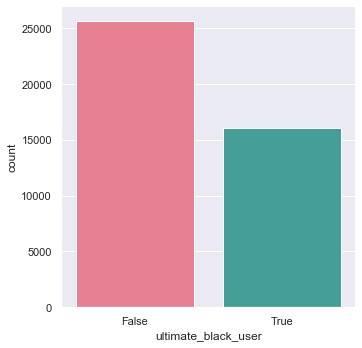

In [31]:
# ultimate black user
sns.catplot(x='ultimate_black_user', kind='count', palette='husl', data=rider)
plt.show()

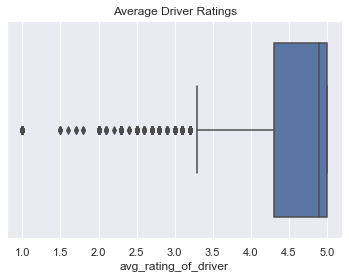

Average Rating: 4.602
Median Rating: 4.9


In [48]:
# average rating of driver
sns.boxplot(x=rider['avg_rating_of_driver'])
plt.title('Average Driver Ratings')
plt.show()

print('Average Rating: {}'.format(round(np.mean(rider['avg_rating_of_driver']), 3)))
print('Median Rating: {}'.format(np.median(rider['avg_rating_of_driver'])))

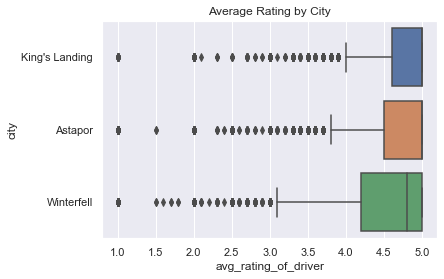

In [49]:
# average rating based on city
sns.boxplot(x='avg_rating_of_driver', y='city', data=rider)
plt.title('Average Rating by City')
plt.show()

Though most drivers received high, positive ratings of 4.6+, drivers in Winterfell received lower ratings compared to their counterparts, King's Landing and Astapor.

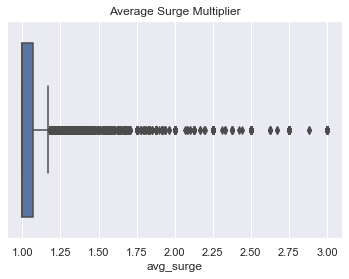

In [58]:
# average surge multiplier over all of this user’s trips
sns.boxplot(x=rider['avg_surge'])
plt.title('Average Surge Multiplier')
plt.show()

In [ ]:
# stats
rider.avg_surge.describe()

1x was the average surge a rider paid for their trips. The max is 8x, which is extreme, and so we are narrowing down the dataset to riders who paid up to 3x the surge charge.

In [55]:
# remove rows with more than 3.1 surge multiplier
rider = rider[rider.avg_surge < 3.1]
rider = rider.reset_index(drop=True)

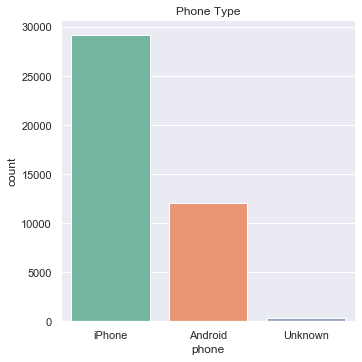

In [57]:
# phone type
sns.catplot(x='phone', kind='count', palette='Set2', data=rider)
plt.title('Phone Type')
plt.show()

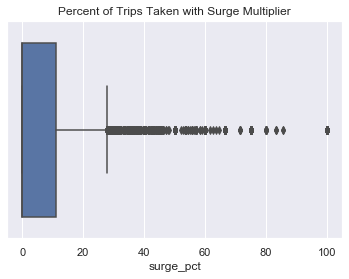

In [60]:
# percent of trips taken with surge multiplier > 1
sns.boxplot(x=rider['surge_pct'])
plt.title('Percent of Trips Taken with Surge Multiplier')
plt.show()

In [61]:
# stats
rider.surge_pct.describe()

count    41525.000000
mean         8.817546
std         18.174222
min          0.000000
25%          0.000000
50%          0.000000
75%         11.100000
max        100.000000
Name: surge_pct, dtype: float64

Around half of all riders did not have to pay a surge when taking rides, but those who did had to do it around 11% of the time. Some riders unfortunately paid 100% of the time. Specifically, we are looking at those who paid up to 40% of their rides as surge rides.

In [63]:
# drop rows that has a surge percentage greater than 40
rider = rider[rider.surge_pct < 41]
rider = rider.reset_index(drop=True)

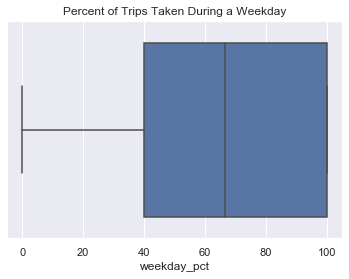

In [64]:
# percent of the user’s trips occurring during a weekday
sns.boxplot(x=rider['weekday_pct'])
plt.title('Percent of Trips Taken During a Weekday')
plt.show()

The majority of riders take between 40-100% of their rides during a weekday!

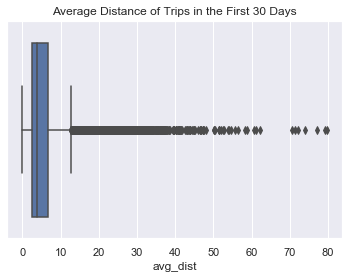

In [65]:
# average distance in miles per trip taken in the first 30 days after signup
sns.boxplot(x=rider['avg_dist'])
plt.title('Average Distance of Trips in the First 30 Days')
plt.show()

In [66]:
# stats
rider.avg_dist.describe()

count    39071.000000
mean         5.540233
std          5.218721
min          0.000000
25%          2.460000
50%          3.830000
75%          6.610000
max         79.690000
Name: avg_dist, dtype: float64

Most riders took short rides though some did take up to 80 miles! We are looking at the majority of rides, so only those that are 20 miles or less in order to understand their patterns.

In [69]:
# drop rows with more than 20 miles
rider = rider[rider.avg_dist < 21]
rider = rider.reset_index(drop=True)

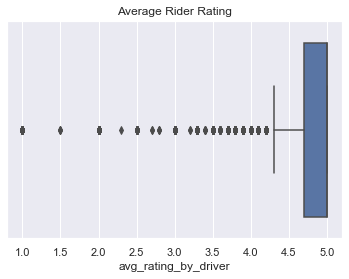

In [72]:
# rider’s average rating over all of their trips
sns.boxplot(x=rider['avg_rating_by_driver'])
plt.title('Average Rider Rating')
plt.show()

In [73]:
# stats
rider.avg_rating_by_driver.describe()

count    38325.000000
mean         4.772705
std          0.400598
min          1.000000
25%          4.700000
50%          5.000000
75%          5.000000
max          5.000000
Name: avg_rating_by_driver, dtype: float64

In [74]:
rider.avg_rating_by_driver.value_counts()

5.0    19290
4.8     4300
4.7     3144
4.9     3014
4.5     2094
4.6     2005
4.0     1208
4.3      937
4.4      827
3.0      346
4.2      331
3.7      179
3.5      147
4.1      120
3.8      100
1.0       86
2.0       62
3.3       42
3.9       37
2.5       23
3.6       17
3.4        5
2.8        3
1.5        3
3.2        2
2.7        2
2.3        1
Name: avg_rating_by_driver, dtype: int64

Most riders had a pleasant ride experience, only a handful averaged ratings less than 3.5. To better understand the riders who gave lower ratings, we are keeping the rides.

In [75]:
# overall stats
rider.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,38325.000000,38325.000000,38325.000000,38325.000000,38325.000000,38325.000000,38325.000000
mean,2.570228,4.600347,1.041608,5.223828,62.144942,5.084074,4.772705
std,3.460327,0.608174,0.091066,9.461865,33.968441,3.932939,0.400598
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,40.000000,2.430000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.770000,5.000000
75%,3.000000,5.000000,1.040000,7.700000,100.000000,6.340000,5.000000
max,25.000000,5.000000,2.330000,40.700000,100.000000,20.990000,5.000000


### sign up and last trip date

In [76]:
rider.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38325 entries, 0 to 38324
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    38325 non-null  object 
 1   trips_in_first_30_days  38325 non-null  int64  
 2   signup_date             38325 non-null  object 
 3   avg_rating_of_driver    38325 non-null  float64
 4   avg_surge               38325 non-null  float64
 5   last_trip_date          38325 non-null  object 
 6   phone                   38325 non-null  object 
 7   surge_pct               38325 non-null  float64
 8   ultimate_black_user     38325 non-null  bool   
 9   weekday_pct             38325 non-null  float64
 10  avg_dist                38325 non-null  float64
 11  avg_rating_by_driver    38325 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.3+ MB


To determine how long a rider remained active, we need to subtract their last active date from when they signed up. First, the sign up date and last trip date columns need to be converted to datetime since they are both currently objects.

In [ ]:
# convert string to datetime
